**p81**

In [ ]:
import csv
strmat = []
with open('p081_matrix.txt') as csvfile:
  matreader = csv.reader(csvfile,delimiter = ',')
  for row in matreader:
    strmat.append(row)

In [ ]:
import numpy as np
N = len(strmat)
mat= np.zeros((N,N),dtype=int)
for i in range(N):
  for j in range(N):
    mat[i,j] = int(strmat[i][j])

In [ ]:
L = 2*N-1
dist = np.zeros((N,N))
dist[0,0] = mat[0,0]
for i in range(1,L):
  for j in range(i+1):
    k = i-j
    if j >= 80 or k>= 80 or j<0 or k<0:
      continue
    if j==0:
      dist[j,k] = dist[j,k-1] + mat[j,k]
    elif k==0:
      dist[j,k] = dist[j-1,k] + mat[j,k]
    else:
      dist[j,k] = min(dist[j-1,k],dist[j,k-1])+mat[j,k]

In [ ]:
dist[-1,-1]

427337.0

**p82**

In [ ]:
import csv
strmat = []
with open('p082_matrix.txt') as csvfile:
  matreader = csv.reader(csvfile,delimiter = ',')
  for row in matreader:
    strmat.append(row)

import numpy as np
N = len(strmat)
mat= np.zeros((N,N),dtype=int)
for i in range(N):
  for j in range(N):
    mat[i,j] = int(strmat[i][j])

In [ ]:
dist = np.zeros((N,N))
dist[:,0] = mat[:,0]
dist[:,1] = mat[:,0] + mat[:,1]
explored = np.zeros((N,N))
explored[:,0] =np.ones(N)

exploring = [(r,1) for r in range(N)]
nextdist = list(mat[:,0] + mat[:,1])

for iter in range(N*N):
  curdist = min(nextdist)
  i = nextdist.index(curdist)
  nextdist.remove(curdist)
  coord = exploring.pop(i)
  
  dist[coord] = curdist
  explored[coord] = 1
  r,c = coord
  
  if c == N-1:
    print(dist[r,c])
    break

  if r+1<N: 
    if(r+1, c) in exploring:
      i = exploring.index((r+1,c))
      nextdist[i] = min(nextdist[i],dist[coord]+mat[r+1,c])
    elif explored[r+1,c]==0:
      exploring.append((r+1,c))
      nextdist.append(dist[coord]+mat[r+1,c])

  if r-1>=0: 
    if(r-1, c) in exploring:
      i = exploring.index((r-1,c))
      nextdist[i] = min(nextdist[i],dist[coord]+mat[r-1,c])
    elif explored[r-1,c]==0:
      exploring.append((r-1,c))
      nextdist.append(dist[coord]+mat[r-1,c])

  if c+1<N:
    if(r, c+1) in exploring:
      i = exploring.index((r,c+1))
      nextdist[i] = min(nextdist[i],dist[coord]+mat[r,c+1])
    elif explored[r,c+1]==0:
      exploring.append((r,c+1))
      nextdist.append(dist[coord]+mat[r,c+1]) 
  




260324.0


**p83**

In [ ]:
import csv
strmat = []
with open('p083_matrix.txt') as csvfile:
  matreader = csv.reader(csvfile,delimiter = ',')
  for row in matreader:
    strmat.append(row)

import numpy as np
N = len(strmat)
mat= np.zeros((N,N),dtype=int)
for i in range(N):
  for j in range(N):
    mat[i,j] = int(strmat[i][j])

In [ ]:
dist = np.zeros((N,N))
dist[0,0] = mat[0,0]
explored = np.zeros((N,N))
explored[0,0] = 1

exploring = [(0,1),(1,0)]
nextdist = [mat[0,0]+mat[0,1], mat[0,0]+mat[1,0]]

for iter in range(N*N):
  curdist = min(nextdist)
  i = nextdist.index(curdist)
  nextdist.remove(curdist)
  coord = exploring.pop(i)
  
  dist[coord] = curdist
  explored[coord] = 1
  r,c = coord
  
  if c == N-1 and r ==N-1:
    print(dist[r,c])
    break

  if r+1<N: 
    if(r+1, c) in exploring:
      i = exploring.index((r+1,c))
      nextdist[i] = min(nextdist[i],dist[coord]+mat[r+1,c])
    elif explored[r+1,c]==0:
      exploring.append((r+1,c))
      nextdist.append(dist[coord]+mat[r+1,c])

  if r-1>=0: 
    if(r-1, c) in exploring:
      i = exploring.index((r-1,c))
      nextdist[i] = min(nextdist[i],dist[coord]+mat[r-1,c])
    elif explored[r-1,c]==0:
      exploring.append((r-1,c))
      nextdist.append(dist[coord]+mat[r-1,c])

  if c+1<N:
    if(r, c+1) in exploring:
      i = exploring.index((r,c+1))
      nextdist[i] = min(nextdist[i],dist[coord]+mat[r,c+1])
    elif explored[r,c+1]==0:
      exploring.append((r,c+1))
      nextdist.append(dist[coord]+mat[r,c+1]) 

  if c-1>=0:
    if(r, c-1) in exploring:
      i = exploring.index((r,c-1))
      nextdist[i] = min(nextdist[i],dist[coord]+mat[r,c-1])
    elif explored[r,c-1]==0:
      exploring.append((r,c-1))
      nextdist.append(dist[coord]+mat[r,c-1])  

425185.0


**p84**

First way: Simulate a bunch of rolls

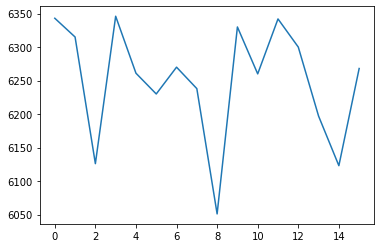

In [ ]:
import random
import matplotlib.pyplot as plt
count = [0]*16
for i in range(100000):
  count[random.randint(0,15)]+=1
plt.plot(count)

In [ ]:
import random
dice = [1,2,3,4]
freq = [0]*40
moves = 1000000
curpos = 0
doublecount = 0
jailbydouble = 0

def land(square):
  freq[square] += 1
#  print(square)
  return square
  

for n in range(10000000):
  d1 = random.choice(dice)
  d2 = random.choice(dice)
#  print('rolled', d1+d2)
  if d1 == d2:
    doublecount += 1
    if doublecount == 3:
      curpos = land(10)
      doublecount = 0
      continue
  else:
    doublecount = 0
  
  curpos = (curpos+d1+d2) % 40
  
  if curpos == 30:
    curpos = land(10)
    continue

  elif curpos in [2,17,33]: #community chest
#    print('land on community chest')
    card = random.randint(0,15)
    if card == 0:
      curpos = land(0)
      continue
    if card == 1:
      curpos = land(10)
      continue
    else:
      curpos = land(curpos)
      continue

  elif curpos in [7,22,36]: #chance
#    print('land on chance')
    card = random.randint(0,15)
    if card == 0: #Go to GO
      curpos = land(0)
      continue
    elif card == 1: # Go to jail
      curpos = land(10)
      continue
    elif card == 2: # Go to C1
      curpos = land(11)
      continue
    elif card == 3: #Go to E3
      curpos = land(24)
      continue
    elif card == 4: #Go to H2
      curpos = land(39)
      continue
    elif card == 5: #Go to R1
      curpos = land(5)
      continue
    elif card == 6 or card == 7: #Go to next rail
      if curpos == 7:
        curpos = land(15)
        continue
      elif curpos == 22:
        curpos = land(25)
        continue
      elif curpos == 36:
        curpos = land(5)
        continue
    elif card == 8: #Go to next utility
      if curpos == 7 or curpos ==36 :
        curpos = land(12)
        continue
      elif curpos == 22:
        curpos = land(28)
        continue
    elif card == 9: #Go back 3 squares
      if curpos == 36: #Going back 3 squares lands on CC
        card2 = random.randint(0,15)
        if card2 == 0:
          curpos = land(0)
          continue
        if card2 == 1:
          curpos = land(10)
          continue
        else:
          curpos = land(33)
          continue
      else:
        curpos = land(curpos - 3)
        continue
    else:
      curpos = land(curpos)
      continue
  
  else:
    curpos = land(curpos)
  

In [ ]:
sortedfreq = sorted(freq,reverse = True)
print('The most commonly landed squares are', [freq.index(sortedfreq[i]) for i in range(3)])

The most commonly landed squares are [10, 15, 24]


**p85**

The number of traingles is $$C^{W+1}_2 * C^{H+1}_2$$ where W and H are the width and height of the grid. So there are
$$\frac{(W+1)W(H+1)H}{4} = \frac{A^2+(W+H)A + A}{4}$$
rectangles. 

In [ ]:
import math
target = 2000000
A = 1
N = 1
for w in range(1,math.floor(math.sqrt(target*2))+1):
  temp = target * 4/w/(w+1)
  h = math.floor(math.sqrt(temp))+1
  while (h+1)*h > temp:
    h -= 1
  n =  w*h*(w+1)*(h+1)/4
  if abs(target - n) < abs(target-N):
    A= w*h
    N = n
print(A)

2772


**p86**

In [ ]:
import numpy as np
import math
M = 5000
#Generate Pythagoran Triples
Pyth_list = []

for m in range(1,4*M):
  for n in range(1,m):
    if math.gcd(m,n) == 1 and (m%2==0 or n%2 ==0):
      a = m**2-n**2
      b = 2*m*n
      c =m**2 + n**2
      for k in range(1, min((4*M//a,4*M//b))):
        Pyth_list.append((k*a, k*b, k*c))

In [ ]:
bin = np.zeros(M+1)
for tri in Pyth_list:
  a,b,c = tri
  A = max((a,b))
  B = min((a,b))
  if B > M:
    continue
  elif A > M:
    if 2*B > A:
      for i in range(A-B,A//2+1):
        bin[B]+=1
  else: #A and B both <= M
    bin[A] += B//2
    if 2*B > A:
      for i in range(A-B,A//2+1):
        bin[B]+=1
count = np.cumsum(bin)


In [ ]:
for i in range(M+1):
  if count[i] > 1000000:
    print(i)
    break

1818


**p87**

In [ ]:
import math 
N = 50000000

In [ ]:
primes = [2]
for i in range(3,math.ceil(math.sqrt(N))+1,2):
  j = 0
  while math.sqrt(i) >= primes[j]:
    if i%primes[j] == 0 :
      break
    j+=1
  else:
    primes.append(i)

In [ ]:
num = set()
for p in primes:
  s1 = p**4
  if s1 > N:
    break
  for q in primes:
    s2 = s1 + q**3
    if s2 > N:
      break
    for r in primes:
      s3 = s2 + r**2
      if s3 > N:
        break
      num.add(s3)

In [ ]:
len(num)

1097343

**p88**

This took 17min to compute. Could probably do better.

In [1]:
import numpy as np
N = 12000
n_k = np.ones(N+1) * np.inf
n_k[0] = 0
n_k[1] = 0

In [2]:
p = [1]
s = [0]
nfac = [0]
for a in range(2,N//2+1):
  curlen = len(p)
  for i in range(curlen):
    pow = 1
    while p[i]*(a**pow) <= 2*N:
      p.append(p[i]*(a**pow))
      s.append(s[i] + a*pow)
      nfac.append(nfac[i]+pow)
      pow +=1 

In [3]:
for i in range(2,len(p)):
  k = nfac[i] + p[i]-s[i]
  if k < len(n_k) and p[i] < n_k[k]:
    n_k[k] = p[i]

In [5]:
sum(set(list(n_k)))

7587457.0

**p89**

In [10]:
def Roman2Num(s):
  n = 0
  prev = ' '
  for c in s:
    if c == 'M':
      n += 1000
      if prev == 'C':
        n -= 200
    if c == 'D':
      n+= 500
      if prev == 'C':
        n-= 200
    if c =='C':
      n+= 100
      if prev == 'X':
        n-=20
    if c == 'L':
      n+= 50
      if prev == 'X':
        n-=20
    if c =='X':
      n+=10
      if prev =='I':
        n-=2
    if c == 'V':
      n+= 5
      if prev =='I':
        n-= 2
    if c =='I':
      n+=1
    prev = c
  return n

In [14]:
def Num2Roman(n):
  temp = n
  chian = temp//1000
  temp = temp%1000
  bai = temp //100
  temp = temp % 100
  shi = temp //10
  yi = temp % 10
  s = ['M']*chian
  if bai == 9:
    s += ['C','M']
  elif bai == 4:
    s += ['C','D'] 
  elif bai >= 5:
    s = s + ['D'] + (['C']*(bai-5))
  else:
    s += ['C']*bai
  
  if shi == 9:
    s += ['X','C']
  elif shi == 4:
    s += ['X','L'] 
  elif shi >= 5:
    s = s + ['L'] + (['X']*(shi-5))
  else:
    s += ['X']*shi
  
  if yi == 9:
    s += ['I','X']
  elif yi == 4:
    s += ['I','V'] 
  elif yi >= 5:
    s = s + ['V'] + (['I']*(yi-5))
  else:
    s += ['I']*yi
  return ''.join(s)

In [18]:
with open('p089_roman.txt') as f:
  data = f.read().splitlines()

In [21]:
count = 0
for x in data:
  y = Num2Roman(Roman2Num(x))
  count += len(y) - len(x)

In [22]:
count

-743

**p90**

It's just easier if we bruteforce all the possible dice configurations...

In [76]:
import itertools
count = 0
diceconfig = list(itertools.combinations(range(10),6))
N = len(diceconfig)
pairs = [(0,1),(0,4),(0,6),(1,6),(2,5),(3,6),(4,6),(1,8)]
for i in range(N):
  for j in range(i,N):
    d1 = diceconfig[i]
    d2 = diceconfig[j]
    valid = True
    for x in pairs:
      if x[1] == 6:
        if not ( (x[0] in d1 and (6 in d2 or 9 in d2)) or (x[0] in d2 and (6 in d1 or 9 in d1)) ):
          valid = False
          break
      else:
        if not ((x[0] in d1 and x[1] in d2) or (x[0] in d2 and x[1] in d1)):
          valid =False
          break
    if valid:
 #    print(d1,d2)
      count+=1

In [77]:
count

1217